# Generate Daily Release Plots
Daily release plots show the metered release rate over the course of one day of testing. Vertical lines indicate when an operator conducted an overpass, with color indicating how the data collected from that overpass was filtered through both Stanford and operator QC requirements.
- Code author: Sahar H. El Abbadi
- Date started: 2023-03-08
- Date last edited: 2023-03-13

# Data Description

Metered data for all airplane testing days is saved in the directory "daily_meter_data". Generate by Philippine Burdeau from Coriolis meter raw data and cleaned in the data processing pipeline.

Columns:
- Date and time are in UTC
- Release rate is in kg/h
- Coriolis Meter (for sensor and transmitter identification numbers and serial numbers, see methods documentation):
    - Baby Corey refers to CMFS015H meter
    - Mama Corey refers to CMF050M meter
    - Papa Corey refres to CMFS150M meter
- QC Flags:
    - 0: no QC flag, original data is good quality
    - 1: non-testing period
    - 2: original data missing, filled as described in data analysis section of methods documentation
    - 3: original data value is below accuracy threshold and replaced with NA


In [1]:
from methods_source import load_flight_days, generate_daily_releases
from plot_methods import plot_daily_releases

# load operator flight days:
load_flight_days()


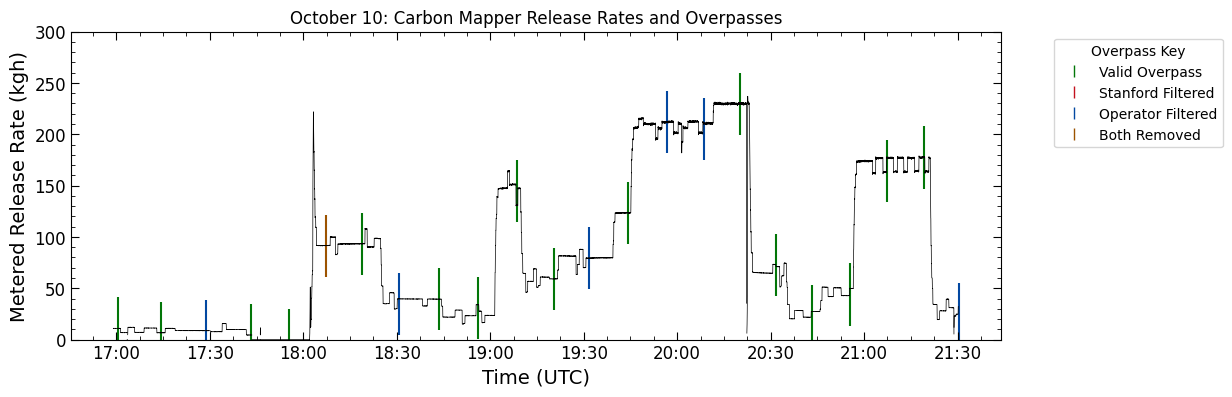

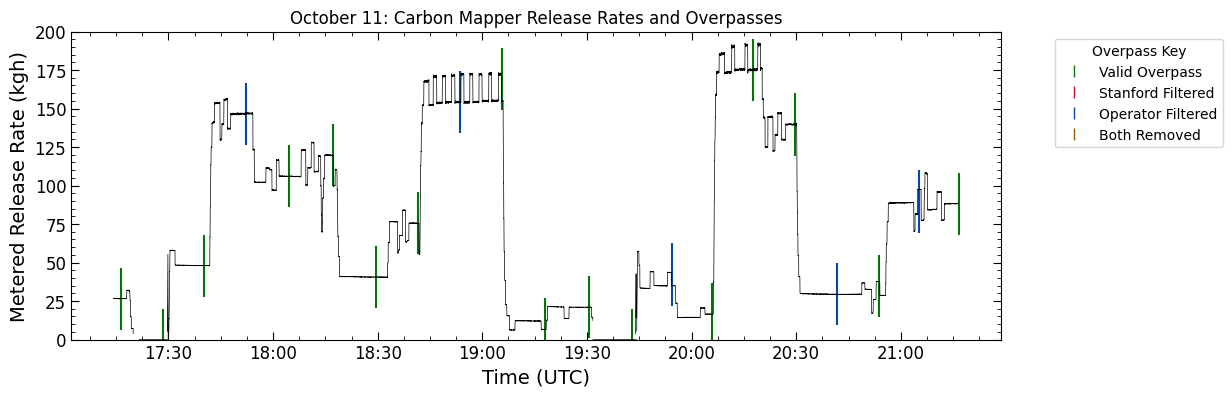

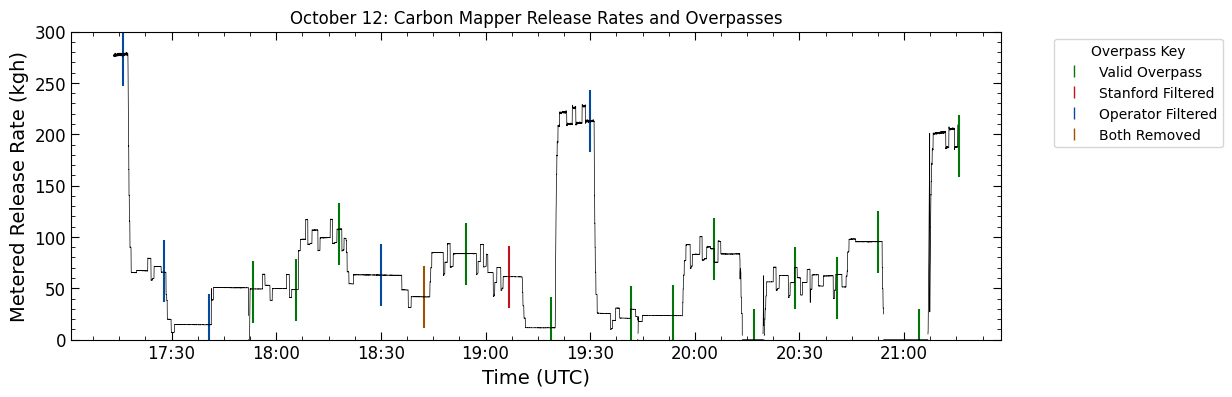

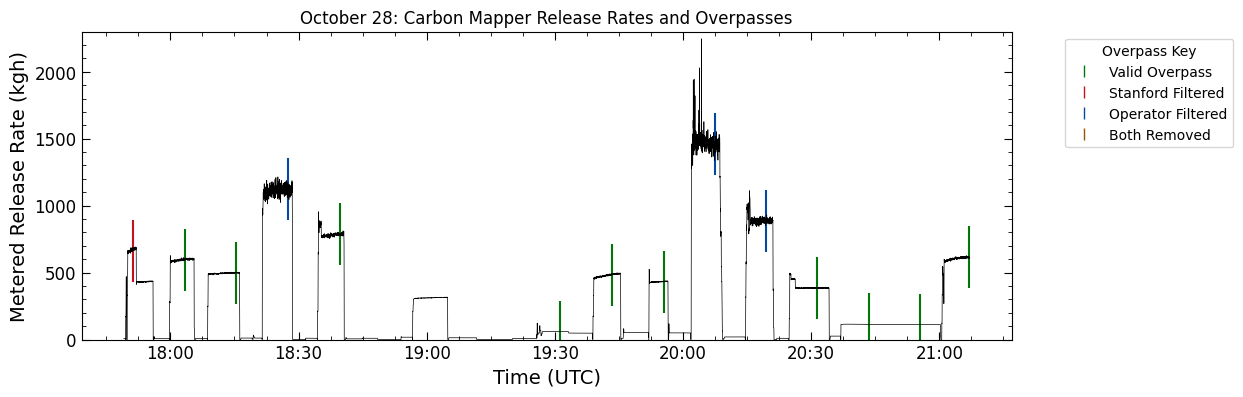

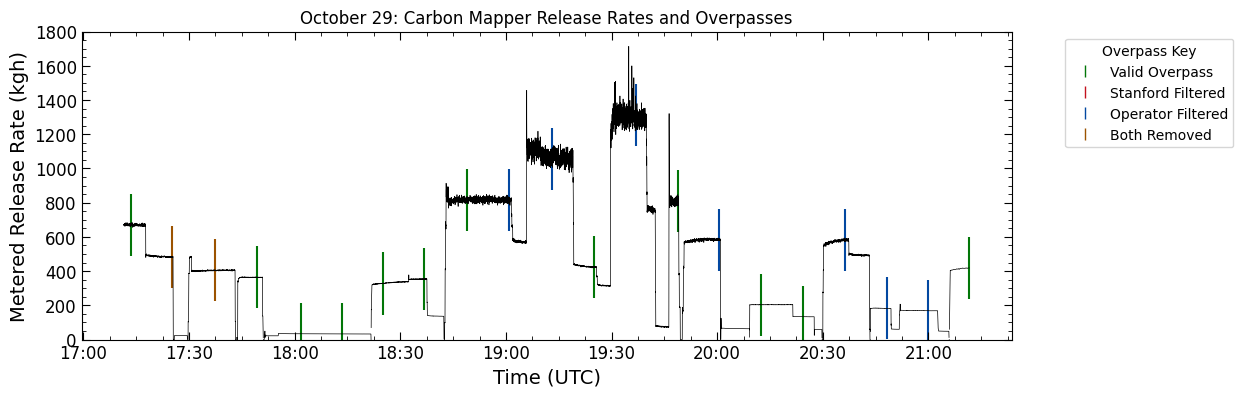

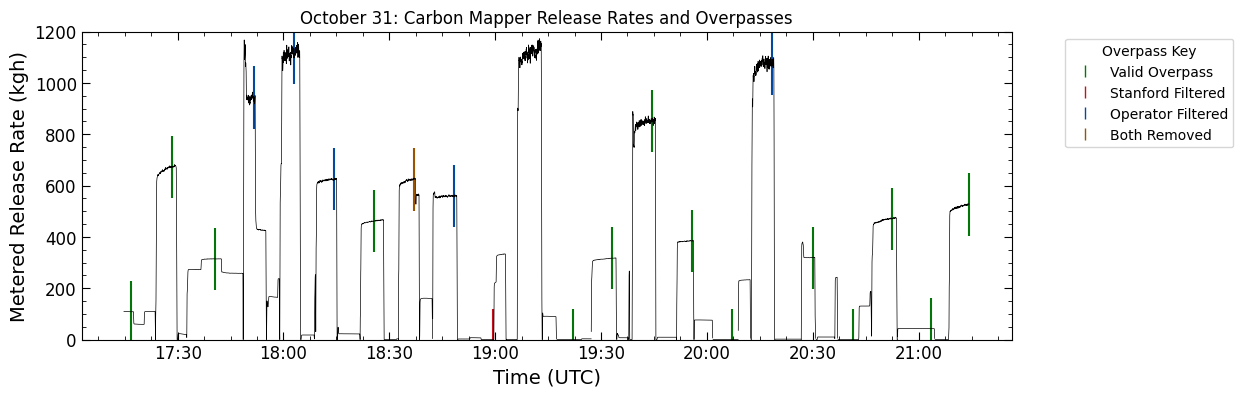

In [2]:
operator = 'Carbon Mapper'

plot_daily_releases(operator, stage=1, strict_discard=False, time_ave=60, gas_comp_source='km')

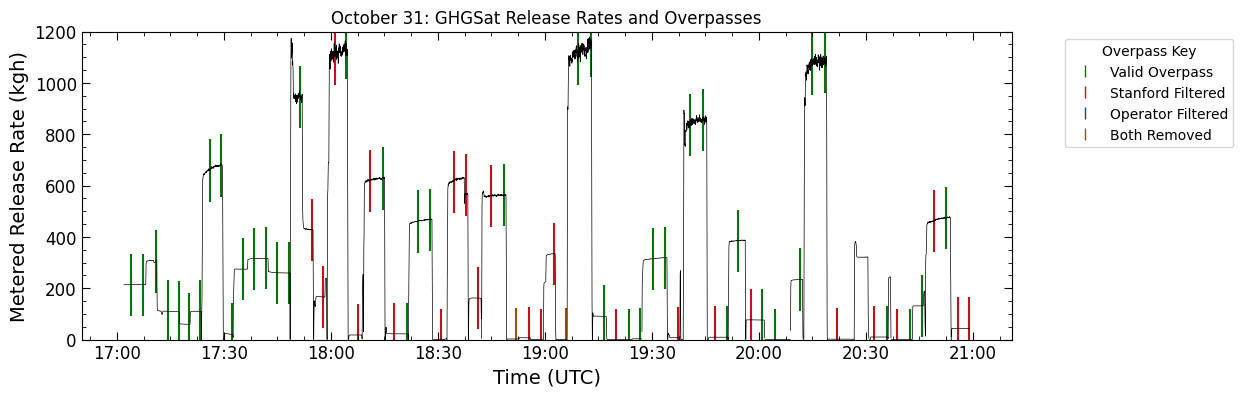

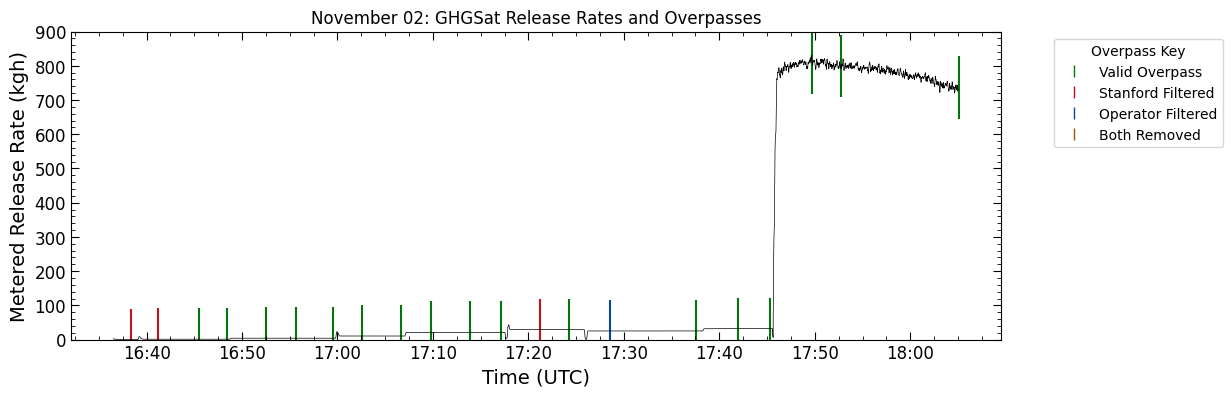

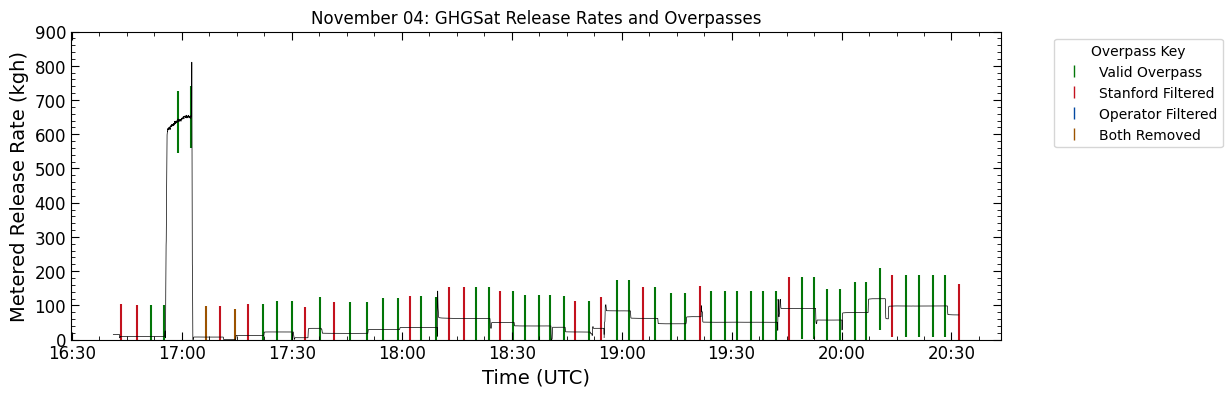

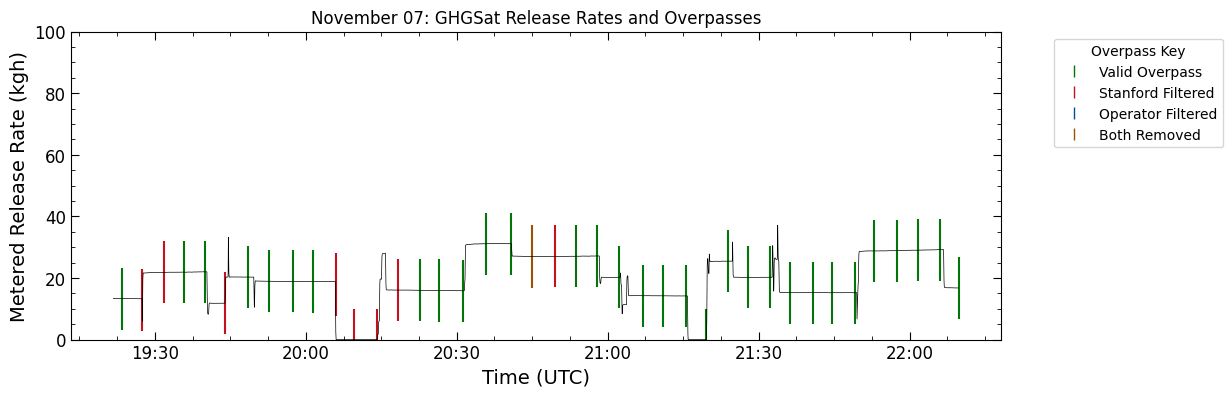

In [3]:
# GHGSat
from plot_methods import plot_daily_releases
operator = 'GHGSat'
plot_daily_releases(operator, stage=1, strict_discard=False, time_ave=60, gas_comp_source='km')


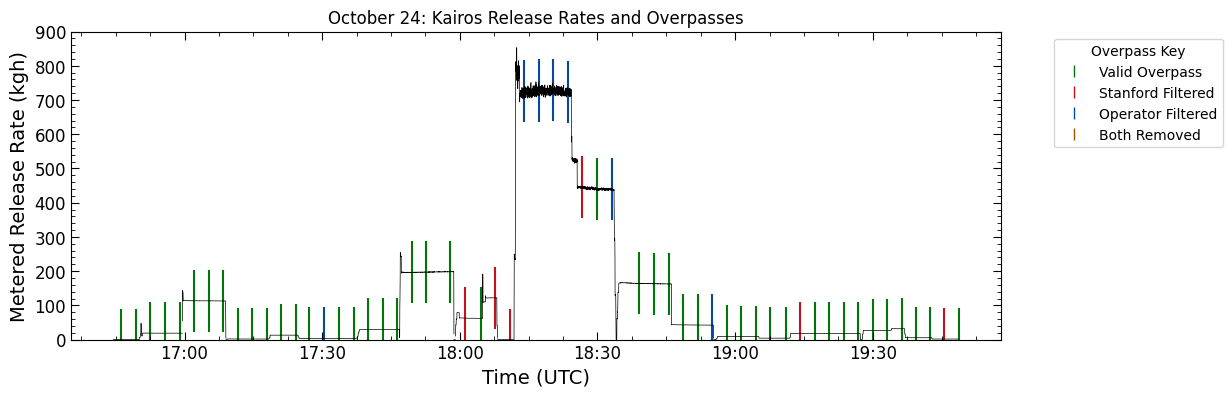

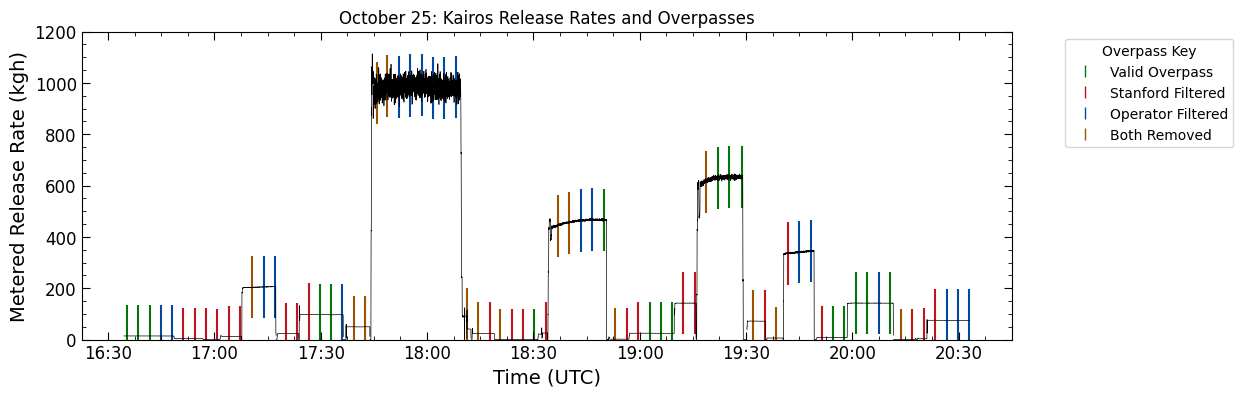

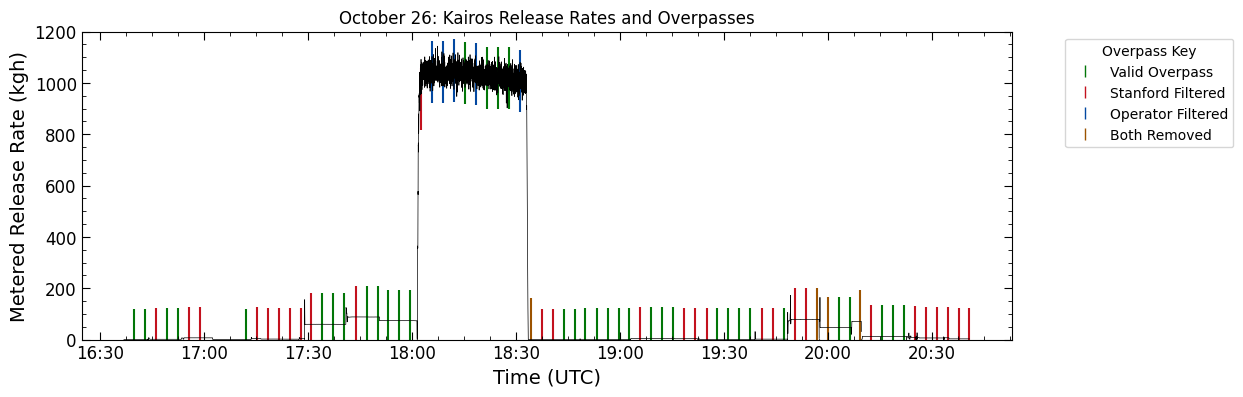

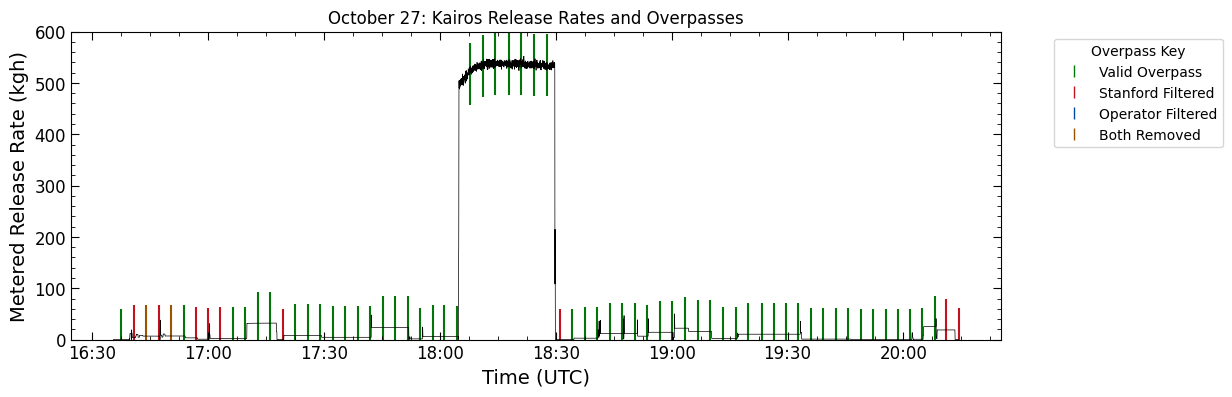

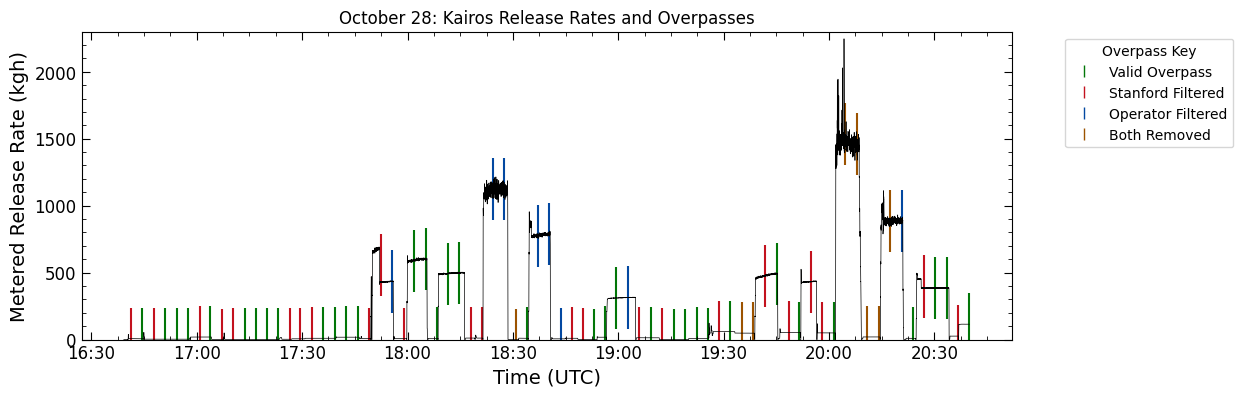

In [4]:
# Kairos

operator = 'Kairos'
plot_daily_releases(operator, stage=1, strict_discard=False, time_ave=60, gas_comp_source='km')

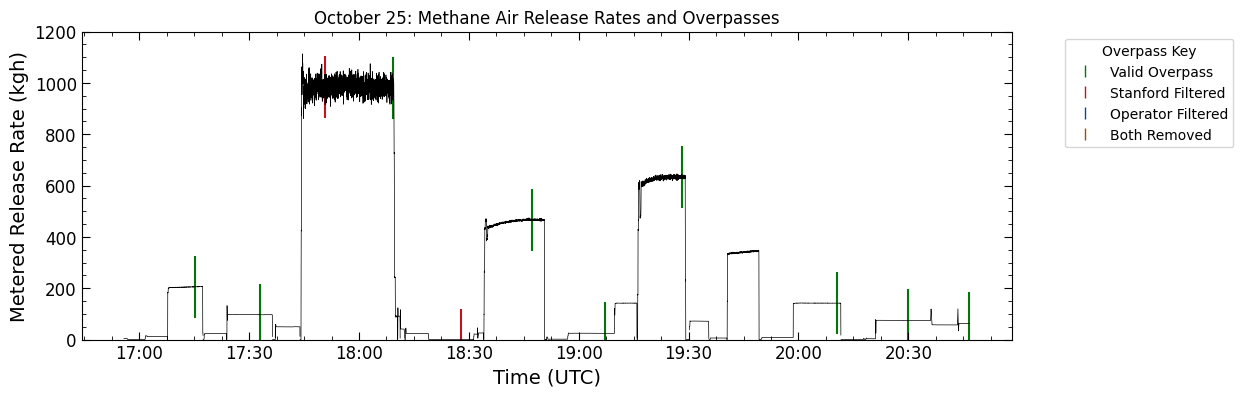

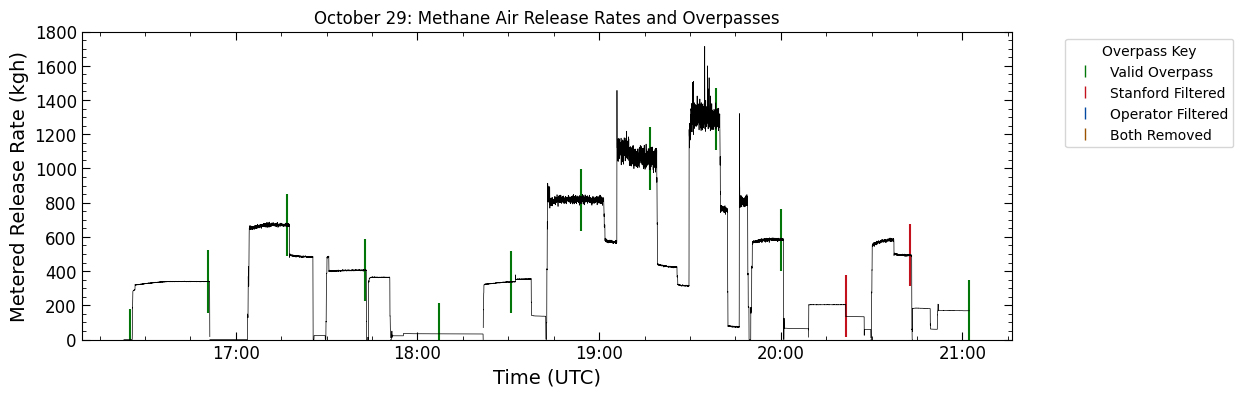

In [5]:
# Methane Air

operator = 'Methane Air'
plot_daily_releases(operator, stage=1, strict_discard=False, time_ave=60, gas_comp_source='km')

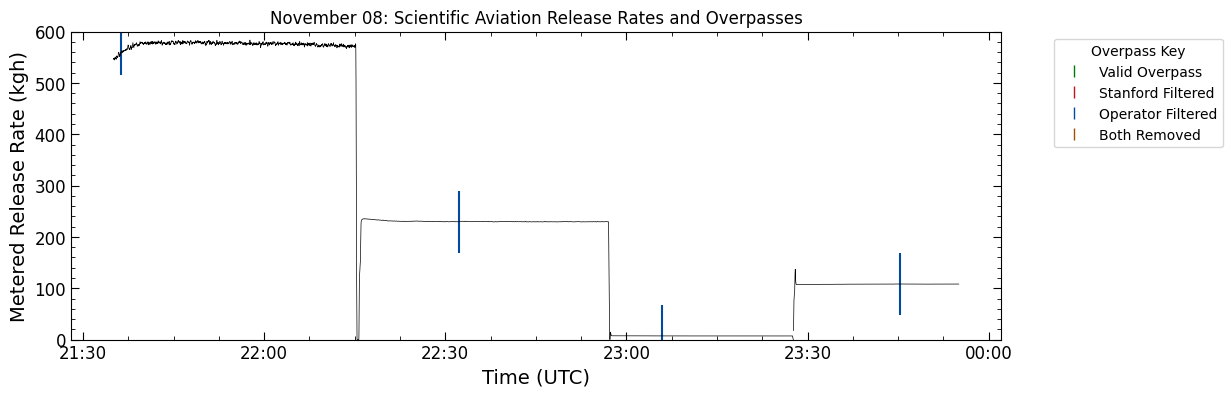

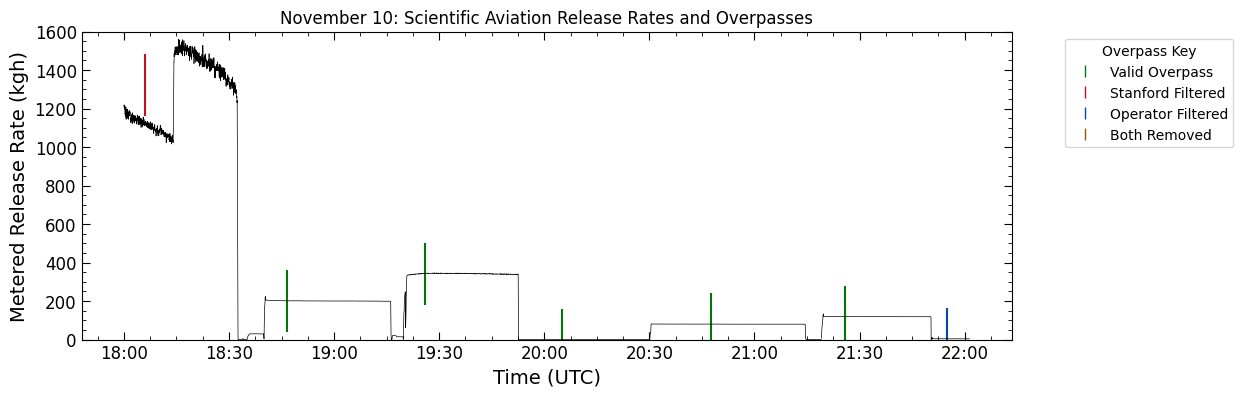

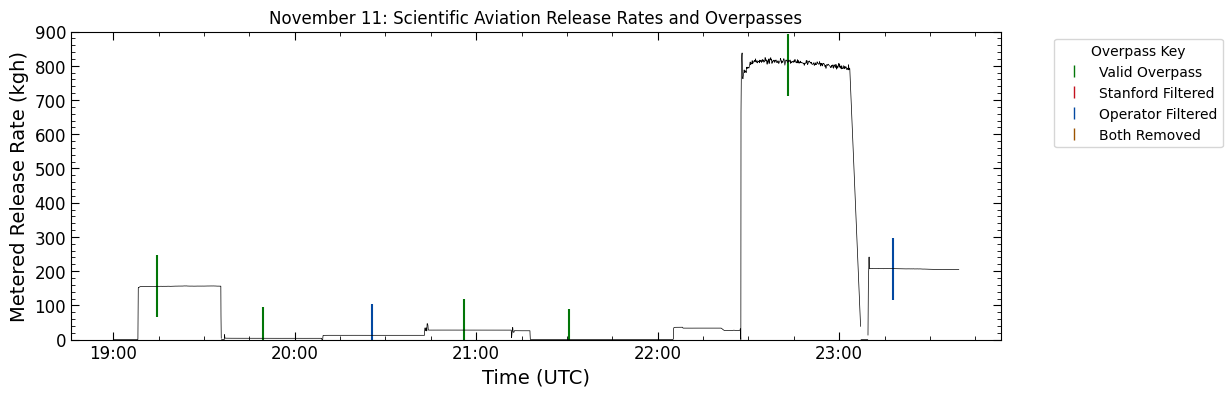

In [2]:
# Scientific Aviation
# For SciAv, Stanford QC criteria is slightly different
# lax discard: include all points
# strict discard: remove points where standard devation is less than 10% of the mean
from plot_methods import plot_daily_releases
operator = 'Scientific Aviation'
plot_daily_releases(operator, stage=1, strict_discard=True, time_ave=60, gas_comp_source='km')
